# Exploratory Data Analysis of the Bank Marketing Data Set

#### Student Name: Chris Cashman
#### Student ID: 21260508

**Question:** What is the best predictor of wealth? <br>
*Here, I define wealth as the amount in a customer's bank account. The actual definition of wealth would encompass more such as number of properties owned and possesions such cars and jewelery, but for our example we will used the simplified version.*

## 1. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')

## 2. Initial Inspection and clean-up

We must initially inspect the data to get a sense of what it is, the size and the general makeup of the data.

In [3]:
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} columns")

2000 rows
17 columns


In [4]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

I thought to approach this data set from a different angle and assume we are given this data set but not told what the columns are. And thus use this EDA to surmise the mean behind some of the columns. <br>
So upon initial inspection and the name of the .csv file, is looks like the data relates to customer records at a bank. With each row corresponding to an individual customer. It is difficult to guess the purpose of the data without more information such as a more in-depth explanation of each non-obvious columns like 'campaign', 'pdays', 'previous', 'poutcome' and 'subscribed'. <br> *(A quick search online showed that this data is related to a marketing campaign by a Portuguese bank but if this wasn't known then a query would have to be raised for more information)*.

Not a big fan of the `.describe()` command, would be better served visualized using a plot such as a box and whisker or violin plot. We will attempt this later on.

In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

The below command gives us our first important insight into the data.
It seems there are quite a few null values, particularly in the column `poutcome`. <br> Another interesting observation is the data type of the column `age`. In the majority of databases, age, is inputted as a natural number so it's unusual for it be formatted as a floating point number. We will investigate this column further and if every value doesn't contain a decimal point then we can convert this column to an int64 data type to keep everything consistant. <br>
The column `campaign` looks to be a categorical type as it only takes values of 1 to 11 so it would be best to convert this to an object type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


***

`pdays` is set to -1 where a customer was not previously part of a marketing campaign. <br>
Makes sense that the number of 0's in `previous` and NaN's in `poutcome` match the number of rows where `pdays == 1`

In [7]:
minus_pdays_df = df[df.pdays == -1]

print(f'Number of rows of in the data where pdays = 1: {len(minus_pdays_df)}')

print('\nCount values of the previous column: ')
print(minus_pdays_df['previous'].value_counts())

print(f"\nNumber of NaN's in poutcome column: {minus_pdays_df['poutcome'].isna().sum()}")

Number of rows of in the data where pdays = 1: 454

Count values of the previous column: 
0    454
Name: previous, dtype: int64

Number of NaN's in poutcome column: 454


### 2a. Age and Campaign data types
This is a good result. This means every value in age can be represented as an integer and that we will not be losing any information.

In [8]:
df[(df.age % 1 != 0.0) & (df.age.notnull())]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []

Note here, we're converting all non-object type columns to Int64 rather than int64. Int64 is a nullable integer type which means it allows for some values to be null whereas int64 does not.

In [9]:
for col in df.select_dtypes(exclude='object').columns:
    print(f"Converting '{col}' column to Int64...")
    df[col] = df[col].astype('Int64')

Converting 'age' column to Int64...
Converting 'balance' column to Int64...
Converting 'day' column to Int64...
Converting 'duration' column to Int64...
Converting 'campaign' column to Int64...
Converting 'pdays' column to Int64...
Converting 'previous' column to Int64...


In [10]:
df['campaign'] = df['campaign'].astype('object')

Taking a look at the output from `.info()` again we see the data types are much better now.

In [11]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 17 entries, age to subscribed
dtypes: Int64(6), object(11)
memory usage: 277.5+ KB


### 2b. Null values

The output from `.info()` above also showed us there are quite a few null values. <br>
Let's see the percentage of missing data in each column.

In [12]:
null_percent = 100*(df.isna().sum() / df.shape[0])

null_percent[null_percent > 0].sort_values(ascending=False)

poutcome     22.70
contact       9.55
education     5.20
age           0.60
job           0.50
dtype: float64

As we can see, poutcome has by far the most missing values at over 20% missing. <br>
Lets take a look at some of this missing data

In [13]:
df[df.isnull().any(axis=1)]

age           job  marital  education default  balance housing loan  \
10     38    management   single        NaN      no      715     yes   no   
15     38   blue-collar  married        NaN      no        0     yes   no   
124    39   blue-collar  married        NaN      no        0      no   no   
209    37    management  married        NaN      no      247      no   no   
255    42           NaN   single    primary      no     2398     yes   no   
...   ...           ...      ...        ...     ...      ...     ...  ...   
1995   20       student   single        NaN      no     2785      no   no   
1996   28        admin.   single  secondary      no      127      no   no   
1997   81       retired  married    primary      no     1154      no   no   
1998   46      services  married    primary      no     4343     yes   no   
1999   40  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration campaign  pdays  previous poutcome  \
10     cellular    2   apr       951        1    132         3  failure   
15     cellular    2   apr       477        2    267         1  failure   
124    cellular    2   feb       731        1    193         3  failure   
209    cellular    2   feb       192        2    208         1  failure   
255    cellular    3   feb       144        2    271         2  failure   
...         ...  ...   ...       ...      ...    ...       ...      ...   
1995   cellular   16   sep       327        2     -1         0      NaN   
1996   cellular   16   sep      1334        2     -1         0      NaN   
1997  telephone   17   sep       231        1     -1         0      NaN   
1998        NaN   20   sep       185        1     -1         0      NaN   
1999   cellular   22   sep       208        2     -1         0      NaN   

     subscribed  
10           no  
15           no  
124          no  
209          no  
255          no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[548 rows x 17 columns]

## 3. Exploration of the categorical variables
We further break this down into ordinal and non-ordinal. As the order matters in the column `month` we will first plot this on a bar chart where the x is in our own custom order. This will give us further insight into this column as without this order the bars will be jumbled up and it will be hard to see a pattern.

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

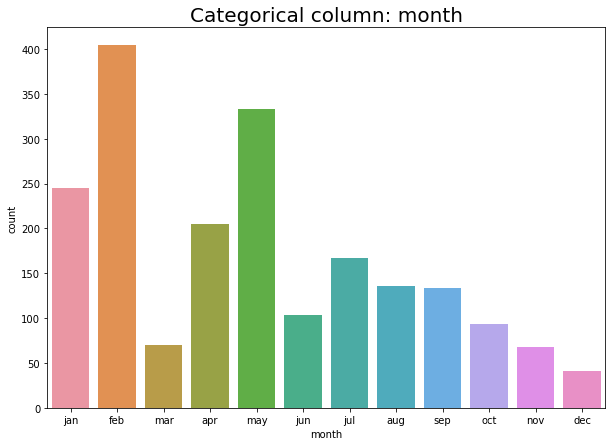

In [15]:
plt.figure(figsize=(10,7))
plt.title(f"Categorical column: month", size=20)
sns.countplot(x=df['month'], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']);

Perfect, we can now see that the data is slightly skewed towards the first half of the year. <br>
Now we can continue on with the rest of the categorical columns.

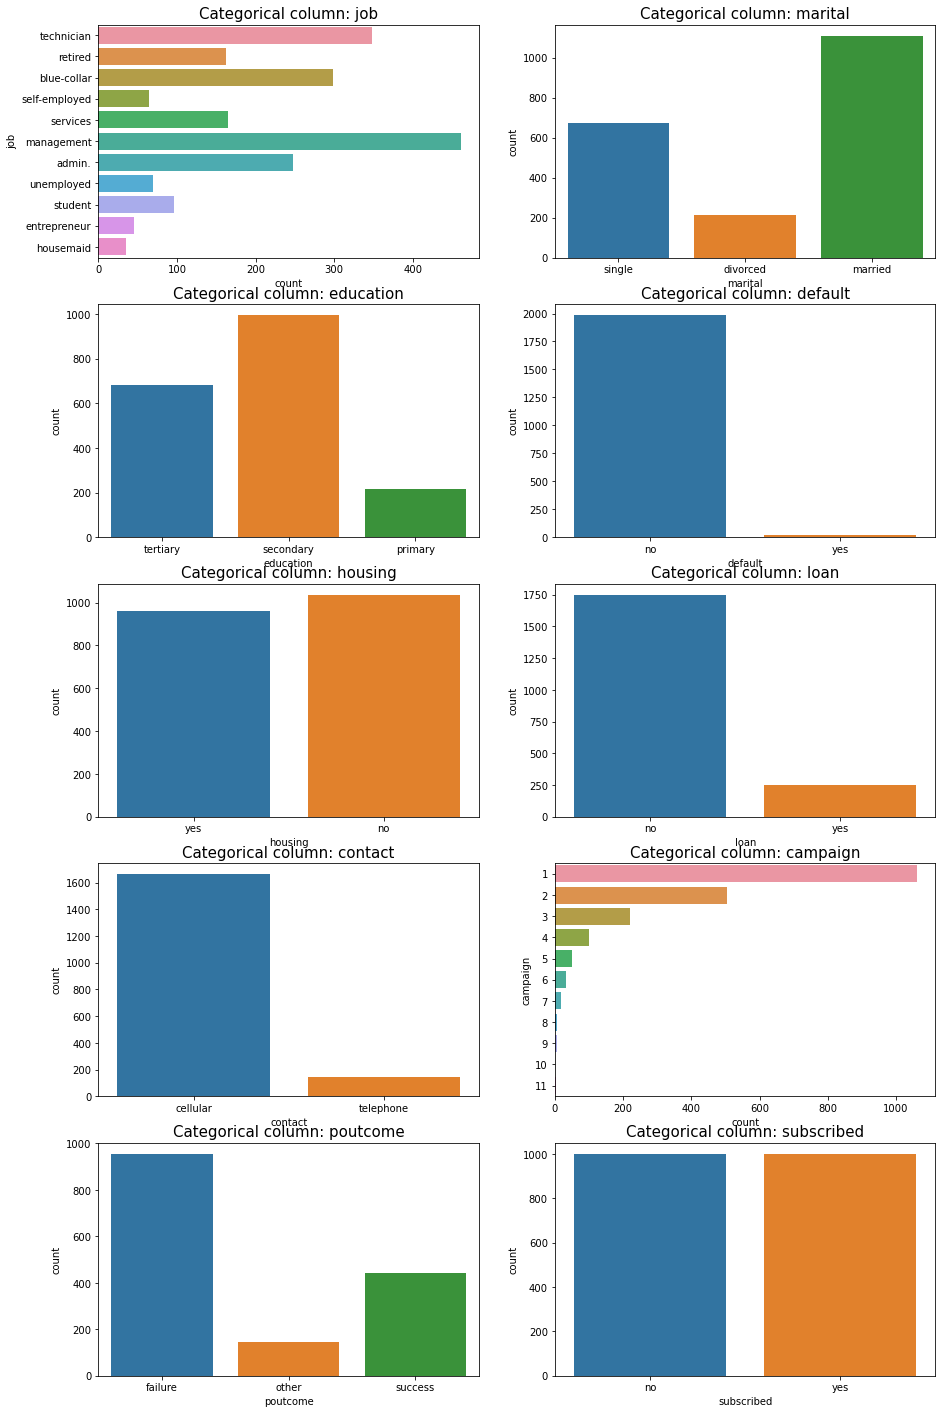

In [16]:
n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

categorical_cols_list = list(categorical_cols)
categorical_cols_list.remove("month")

plt.figure(figsize=(15,30))

for n, column in enumerate(categorical_cols_list):
    ax = plt.subplot(n_rows, n_cols, n+1)
    ax.set_title(f"Categorical column: {column}", size=15)
    if len(df[column].value_counts()) > 5:
        sns.countplot(y=df[column], ax=ax)
    else:
        sns.countplot(x=df[column], ax=ax)

Some inferences with can ascertain from the above bar charts:
1. A customer is more likely to be married
2. A customer is more likely to have a second level education or higher
3. A customer is more much more likely to not have defaulted
4. A customer is more much more likely to not have a loan
5. A customer is more much more likely to be reachable on a mobile phone

## 4. Exploration of the numeric variables

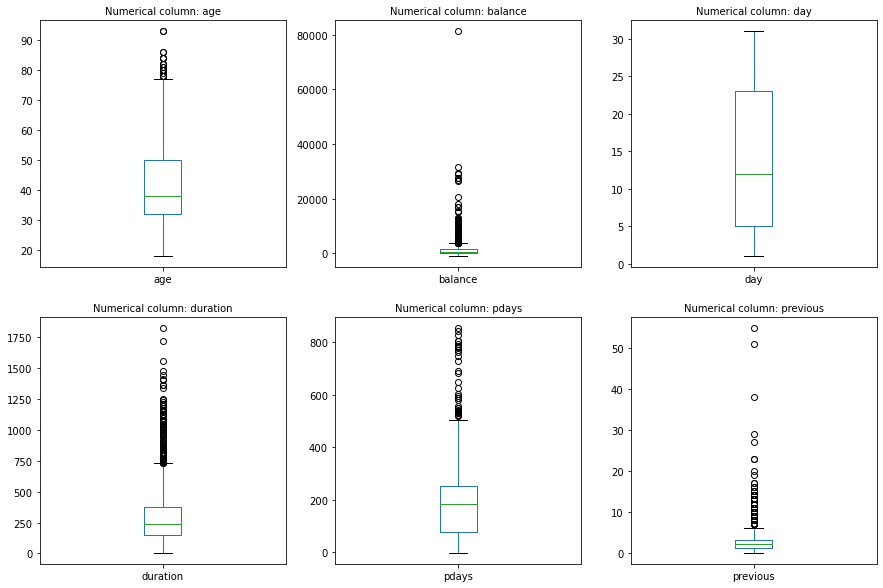

In [17]:
numeric_cols = df.select_dtypes(exclude='object').columns

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15,10))

for n, column in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, n+1)
    ax.set_title(f"Numerical column: {column}", size=10)
    df.boxplot(column=column, ax=ax, grid=False)

The above box plots shows us lots of things. Firstly, looking at the boxplot for the column labeled `day`, we see that most likely day refers to the day of the month and we verify that below. <br>
Secondly, there are a lot of outliers in the `balance`, `duration`, `pdays` and `previous` columns.

## 5. Correlations
After iterating through every possible color map combination I chose to go with 'YlGnBu' as it was both visually appealing and the correlation between the variables was still legible. <br>
After visualising our heatmap it seems that there is only a slight correlation between `previous` and `pdays`, and also `balance` and `age`. The former would start to suggest that the 'p' in `pdays` might stand for `previous`. In the latter, a correlation does not come as a shock as the older you are the most money you will have accured throughout your life - I would expect a positive correlation here.

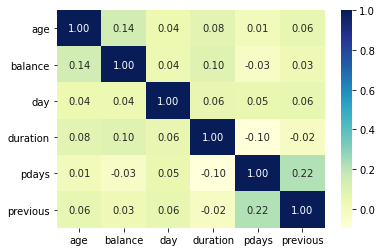

In [18]:
# Edited based on Martin's suggestion
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f');

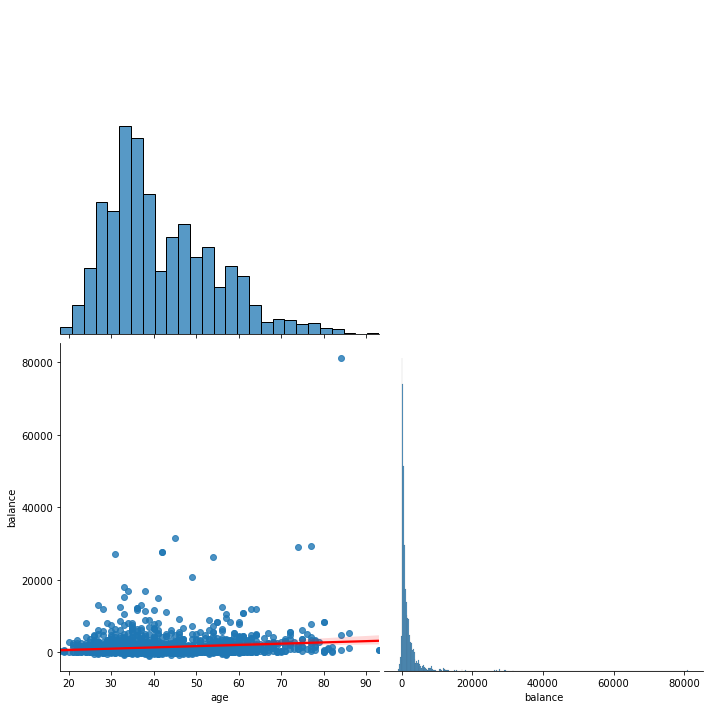

In [19]:
# Edited based on Martin's suggestion
sns.pairplot(data=df[['age','balance']].dropna().astype('float64'),
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}},
             height=5,
             corner=True
            );

In [20]:
reg_df = df[['age','balance']].astype('float')

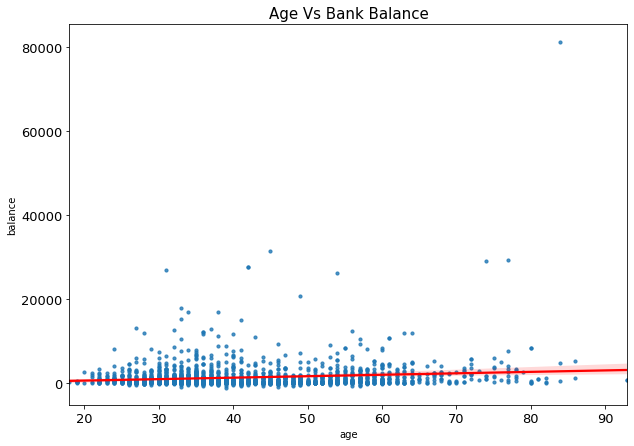

In [21]:
plt.figure(figsize=(10,7))
plt.title('Age Vs Bank Balance', size=15)

sns.regplot(data=reg_df, x='age', y='balance', scatter_kws={"color": "tab:blue", "s":10}, line_kws={"color": "red"})

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Very hard to see a correlation there even if mathematically, one does exist.

## 6. Answering the question posed at the start - What is the best predictor of wealth?

### 6a. Investigation into Age

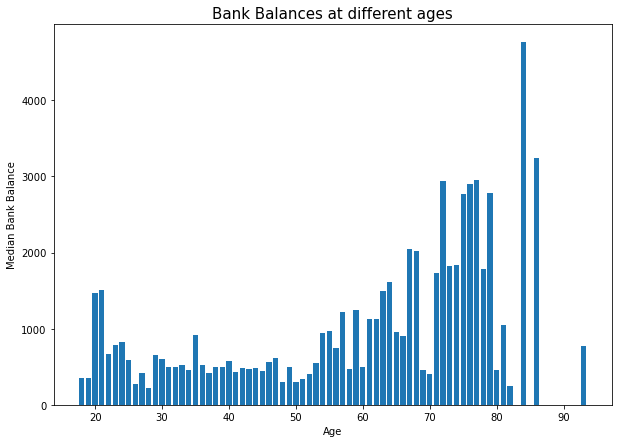

In [22]:
median_balance_by_age = df.groupby(['age'])['balance'].median()

plt.figure(figsize=(10,7))
plt.bar(median_balance_by_age.index, median_balance_by_age.values)
plt.title("Bank Balances at different ages", fontsize=15)

plt.xlabel("Age")
plt.ylabel("Median Bank Balance")

plt.show()

We can see a clear increase in bank balance amounts as age increases. This coincides with our intuition about older customers having more wealth as they have had a longer time to accrue.

In [23]:
# This confirms the above but shows it's very weakly correlated.
df.corr()['balance']['age']

0.1398740609321556

### 6b. Investigation of Job Types

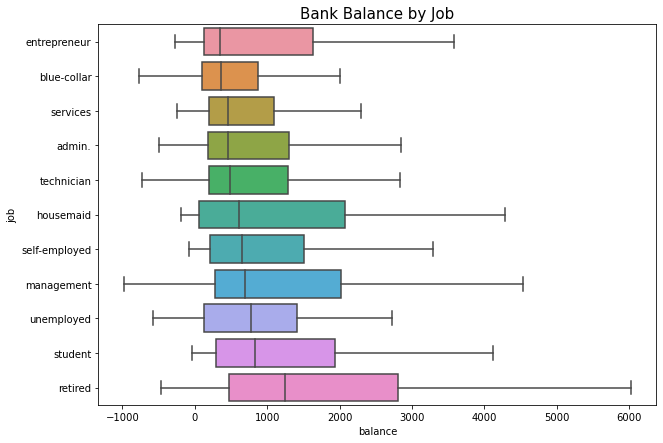

In [24]:
median_balance_by_job = df.groupby(['job'])['balance'].median().sort_values()

plt.figure(figsize=(10,7))
plt.title('Bank Balance by Job', size=15)
sns.boxplot(x='balance', y='job', data=df, showfliers=False, order=median_balance_by_job.index)
plt.show()

Ordered by median bank balances, we see blue-collar work towards the bottom of the pile in terms of bank balances. It also makes sense that entrepreneurs would have lower balances as most of their money would be invested into their businesses.

In [25]:
def categorize_job(row):
    """
    Function to group job types into bigger categories
    """
    
    job = row['job']
    if job in ['blue-collar','technician','housemaid','self-employed']:
        return 'blue-collar'
    elif job in ['entrepreneur','services','admin.','management']:
        return 'white-collar'
    else:
        return job

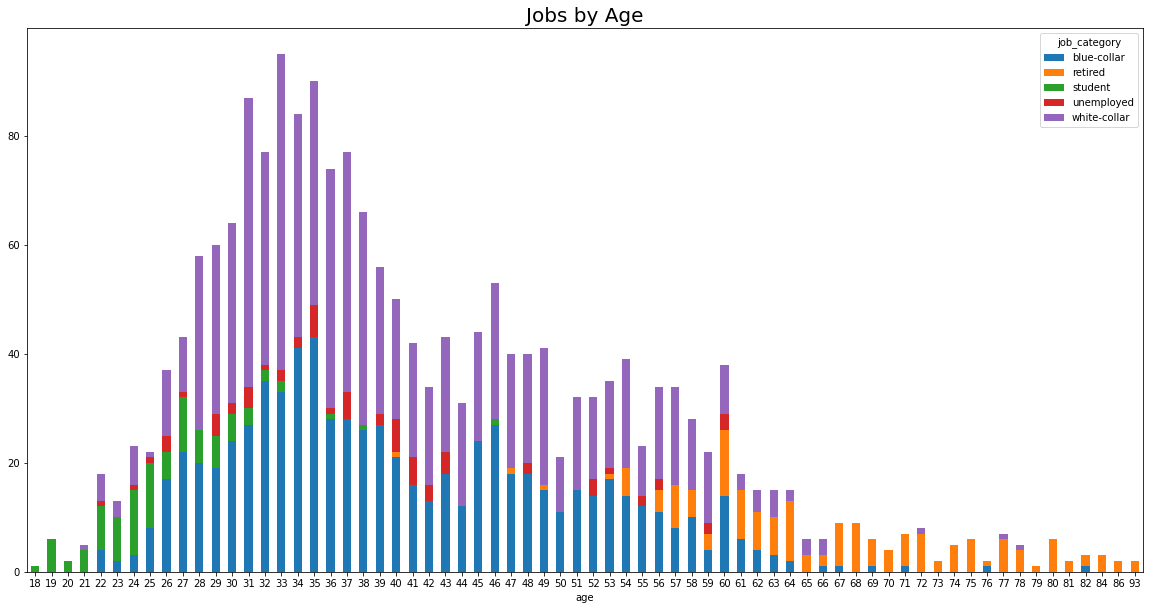

In [26]:
df['job_category'] = df.apply(categorize_job, axis=1)
job_cate_df = df[['age','job_category']].dropna().sort_values(by='age').reset_index(drop=True)
job_crosstab = pd.crosstab(job_cate_df['age'], job_cate_df['job_category'])

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title('Jobs by Age', fontsize=20)
job_crosstab.plot(kind='bar', stacked=True, figsize=(20,10), rot=0, ax=ax);

Nice graph even if it does state the obvious. Students represented towards the start of the distrubtion and retirees towards the end. I'd like some advice from that one retiree at 40.

### 6c. Investigation of Education Level

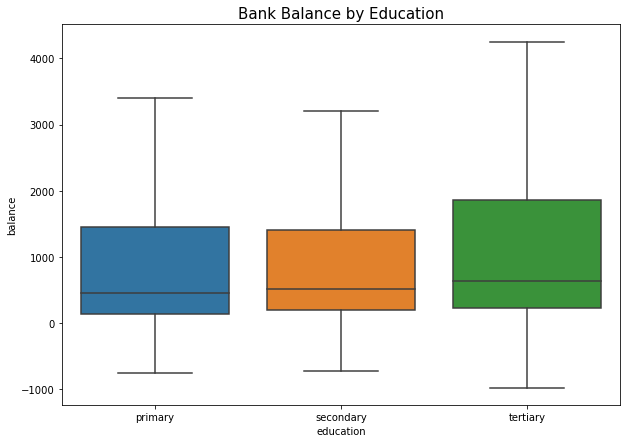

In [27]:
median_balance_by_education = df.groupby(['education'])['balance'].median().sort_values()

plt.figure(figsize=(10,7))
plt.title('Bank Balance by Education', size=15)
sns.boxplot(x='education', y='balance', data=df, showfliers=False, order=median_balance_by_education.index)
plt.show()

While I thought it would be closer, the above graph shows that there is a clear correlation between having a college education or above and have more in your bank account.

### 6d. Investigation of Marital Status

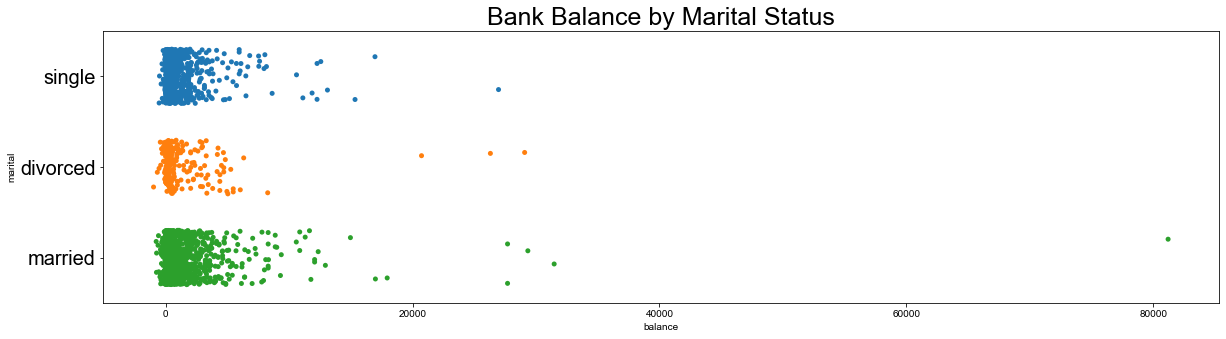

In [28]:
fig, ax = plt.subplots(figsize=(20,5))

sns.set_style("white")
ax.set_title('Bank Balance by Marital Status', fontsize=25)
ax.yaxis.set_tick_params(labelsize=20)
sns.stripplot(x=df['balance'], y=df['marital'], ax=ax, jitter=0.3)

plt.show()

We can see here that married customers are much more represented in the data and the divorcess have a lower median bank balance.

In [29]:
df.groupby('marital')['balance'].median().sort_values(ascending=False)

marital
married     583.0
single      515.0
divorced    507.0
Name: balance, dtype: Float64

**Conclusion:** <br>
Using our results from above we can say that the best predictor of wealth are job type, and particularly if the customer is retired. Other good predictors are older aged customers and customers with a third level education.